# The Stanford POS Tagger


Web app version: http://nlp.stanford.edu:8080/parser/ ; https://corenlp.run/

Newer version of the NLTK interface, requires running a java server locally: https://github.com/nltk/nltk/wiki/Stanford-CoreNLP-API-in-NLTK


### Downloading the tagger and models

Download and uzip the model. You can do the same thing on your own computer to be able to use it locally.

In [ ]:
%%time
!wget 'https://nlp.stanford.edu/software/stanford-tagger-4.2.0.zip'
!unzip './stanford-tagger-4.2.0.zip'

--2023-03-13 10:06:02--  https://nlp.stanford.edu/software/stanford-tagger-4.2.0.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://downloads.cs.stanford.edu/nlp/software/stanford-tagger-4.2.0.zip [following]
--2023-03-13 10:06:02--  https://downloads.cs.stanford.edu/nlp/software/stanford-tagger-4.2.0.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78034596 (74M) [application/zip]
Saving to: ‘stanford-tagger-4.2.0.zip’

stanford-tagger-4.2 100%[===================>]  74.42M  5.12MB/s    in 11s     

2023-03-13 10:06:14 (6.97 MB/s) - ‘stanford-tagger-4.2.0.zip’ saved [78034596/78034596]

Archive:  ./stanford-tagger-4.2.0.zip
   creatin

### Setting up and using the tagger with NLTK

In [ ]:
model_path='./stanford-postagger-full-2020-11-17/models/english-bidirectional-distsim.tagger'
jar_tagger_path='./stanford-postagger-full-2020-11-17/stanford-postagger-4.2.0.jar'

In [ ]:
from nltk.tag.stanford import StanfordPOSTagger # -- deprecated?


In [ ]:
!pip freeze | grep nltk # needs nltk >= 3.5

nltk==3.7


In [ ]:
tagger=StanfordPOSTagger(model_path, jar_tagger_path)


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
tagger.tag(nltk.word_tokenize("I am eating a lot of candy."))

[('I', 'PRP'),
 ('am', 'VBP'),
 ('eating', 'VBG'),
 ('a', 'DT'),
 ('lot', 'NN'),
 ('of', 'IN'),
 ('candy', 'NN'),
 ('.', '.')]

In [ ]:
tagger.tag(nltk.word_tokenize("Time flies like an arrow."))

[('Time', 'NNP'),
 ('flies', 'VBZ'),
 ('like', 'IN'),
 ('an', 'DT'),
 ('arrow', 'NN'),
 ('.', '.')]

In [ ]:
tagger.tag(nltk.word_tokenize("Fruit flies like a banana."))

[('Fruit', 'NNP'),
 ('flies', 'VBZ'),
 ('like', 'IN'),
 ('a', 'DT'),
 ('banana', 'NN'),
 ('.', '.')]

In [ ]:
tagger.tag(nltk.word_tokenize("I don't like fruit flies like a banana."))

[('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('like', 'VB'),
 ('fruit', 'NN'),
 ('flies', 'NNS'),
 ('like', 'IN'),
 ('a', 'DT'),
 ('banana', 'NN'),
 ('.', '.')]

In [ ]:
tagger.tag(nltk.word_tokenize("I am eating a lot of candy."))

[('I', 'PRP'),
 ('am', 'VBP'),
 ('eating', 'VBG'),
 ('a', 'DT'),
 ('lot', 'NN'),
 ('of', 'IN'),
 ('candy', 'NN'),
 ('.', '.')]

In [ ]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
tagger.tag([st.stem(t)
      for t in nltk.word_tokenize("I am eating a lot of candy.")])

[('i', 'PRP'),
 ('am', 'VBP'),
 ('eat', 'VB'),
 ('a', 'DT'),
 ('lot', 'NN'),
 ('of', 'IN'),
 ('candi', 'NN'),
 ('.', '.')]

### Using averaged_perceptron_tagger in NLTK

In [ ]:
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
nltk.pos_tag(nltk.word_tokenize("I am eating a lot of candy."))

[('I', 'PRP'),
 ('am', 'VBP'),
 ('eating', 'VBG'),
 ('a', 'DT'),
 ('lot', 'NN'),
 ('of', 'IN'),
 ('candy', 'NN'),
 ('.', '.')]

In [ ]:
nltk.pos_tag(nltk.word_tokenize("Time flies like an arrow."))

[('Time', 'NNP'),
 ('flies', 'NNS'),
 ('like', 'IN'),
 ('an', 'DT'),
 ('arrow', 'NN'),
 ('.', '.')]

In [ ]:
nltk.pos_tag(nltk.word_tokenize("Fruit flies like a banana."))

[('Fruit', 'NNP'),
 ('flies', 'VBZ'),
 ('like', 'IN'),
 ('a', 'DT'),
 ('banana', 'NN'),
 ('.', '.')]

Understanding the tags

In [ ]:
nltk.download('tagsets')


[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


True

In [ ]:
nltk.help.upenn_tagset('NNP')


NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...


# Tagged corpora

In [ ]:
nltk.download('brown')
nltk.corpus.brown.tagged_words()

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

In [ ]:
list(nltk.corpus.brown.tagged_sents(categories='news'))[:2]

[[('The', 'AT'),
  ('Fulton', 'NP-TL'),
  ('County', 'NN-TL'),
  ('Grand', 'JJ-TL'),
  ('Jury', 'NN-TL'),
  ('said', 'VBD'),
  ('Friday', 'NR'),
  ('an', 'AT'),
  ('investigation', 'NN'),
  ('of', 'IN'),
  ("Atlanta's", 'NP$'),
  ('recent', 'JJ'),
  ('primary', 'NN'),
  ('election', 'NN'),
  ('produced', 'VBD'),
  ('``', '``'),
  ('no', 'AT'),
  ('evidence', 'NN'),
  ("''", "''"),
  ('that', 'CS'),
  ('any', 'DTI'),
  ('irregularities', 'NNS'),
  ('took', 'VBD'),
  ('place', 'NN'),
  ('.', '.')],
 [('The', 'AT'),
  ('jury', 'NN'),
  ('further', 'RBR'),
  ('said', 'VBD'),
  ('in', 'IN'),
  ('term-end', 'NN'),
  ('presentments', 'NNS'),
  ('that', 'CS'),
  ('the', 'AT'),
  ('City', 'NN-TL'),
  ('Executive', 'JJ-TL'),
  ('Committee', 'NN-TL'),
  (',', ','),
  ('which', 'WDT'),
  ('had', 'HVD'),
  ('over-all', 'JJ'),
  ('charge', 'NN'),
  ('of', 'IN'),
  ('the', 'AT'),
  ('election', 'NN'),
  (',', ','),
  ('``', '``'),
  ('deserves', 'VBZ'),
  ('the', 'AT'),
  ('praise', 'NN'),
  ('and', 

### Penn Treebank Corpus

References:

Paper with Penn Treebank description: https://www.researchgate.net/publication/2873803_The_Penn_Treebank_An_overview

List of explanations for tag acronyms: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html


In [ ]:
nltk.download('treebank')
len(list(nltk.corpus.treebank.tagged_words()))

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


100676

In [ ]:
nltk.corpus.treebank.tagged_words()

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ...]

Other tools, POS Tagging performance & comparison: https://aclweb.org/aclwiki/index.php?title=POS_Tagging_(State_of_the_art)

# Syntactic Parsing

### Stanford Parser

You can try the usage below locally: (needs java)

In [ ]:
!wget 'https://nlp.stanford.edu/software/stanford-parser-4.2.0.zip'
!unzip 'stanford-parser-4.2.0.zip'


--2023-03-21 11:48:00--  https://nlp.stanford.edu/software/stanford-parser-4.2.0.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://downloads.cs.stanford.edu/nlp/software/stanford-parser-4.2.0.zip [following]
--2023-03-21 11:48:00--  https://downloads.cs.stanford.edu/nlp/software/stanford-parser-4.2.0.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182285548 (174M) [application/zip]
Saving to: ‘stanford-parser-4.2.0.zip’

stanford-parser-4.2 100%[===================>] 173.84M  5.08MB/s    in 30s     

2023-03-21 11:48:31 (5.73 MB/s) - ‘stanford-parser-4.2.0.zip’ saved [182285548/182285548]

Archive:  stanford-parser-4.2.0.zip
   creat

In [ ]:
# !wget 'https://nlp.stanford.edu/software/stanford-corenlp-4.2.0-models-english.jar'

--2023-03-13 10:32:19--  https://nlp.stanford.edu/software/stanford-corenlp-4.2.0-models-english.jar
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://downloads.cs.stanford.edu/nlp/software/stanford-corenlp-4.2.0-models-english.jar [following]
--2023-03-13 10:32:19--  https://downloads.cs.stanford.edu/nlp/software/stanford-corenlp-4.2.0-models-english.jar
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 669395561 (638M) [application/java-archive]
Saving to: ‘stanford-corenlp-4.2.0-models-english.jar’

stanford-corenlp-4. 100%[===================>] 638.38M  5.02MB/s    in 2m 2s   

2023-03-13 10:34:22 (5.22 MB/s) - ‘stanford-corenlp-4.2.0-mode

In [ ]:
import os
from nltk.parse.stanford import StanfordParser


In [ ]:
os.environ['JAVAHOME'] = "/usr/bin/java"
os.environ['STANFORD_PARSER'] = '/content/stanford-parser-full-2020-11-17/stanford-parser.jar'
os.environ['STANFORD_MODELS'] = '/content/stanford-parser-full-2020-11-17/stanford-parser-4.2.0-models.jar'


In [ ]:

parser = StanfordParser(model_path="/content/stanford-corenlp-4.2.0-models-english.jar")
propozitii = parser.raw_parse_sents(("I like to go to school.", "The cat is running through the room.","Where are you?"))
for prop in propozitii:
    print(list(prop))

<ipython-input-5-dd9aad16e19a>:1: DeprecationWarning: The StanfordParser will be deprecated
Please use nltk.parse.corenlp.CoreNLPParser instead.
  parser = StanfordParser(model_path="/content/stanford-corenlp-4.2.0-models-english.jar")


[main] ERROR edu.stanford.nlp.parser.lexparser.LexicalizedParser - java.io.IOException: Unable to open "/content/stanford-corenlp-4.2.0-models-english.jar" as class path, filename or URL
  edu.stanford.nlp.io.IOUtils.getInputStreamFromURLOrClasspathOrFileSystem(IOUtils.java:501)
  edu.stanford.nlp.io.IOUtils.readStreamFromString(IOUtils.java:402)
  edu.stanford.nlp.parser.lexparser.LexicalizedParser.getParserFromSerializedFile(LexicalizedParser.java:567)
  edu.stanford.nlp.parser.lexparser.LexicalizedParser.getParserFromFile(LexicalizedParser.java:373)
  edu.stanford.nlp.parser.lexparser.LexicalizedParser.loadModel(LexicalizedParser.java:183)
  edu.stanford.nlp.parser.lexparser.LexicalizedParser.main(LexicalizedParser.java:1373)
java.io.IOException: Unable to open "/content/stanford-corenlp-4.2.0-models-english.jar" as class path, filename or URL
	at edu.stanford.nlp.io.IOUtils.getInputStreamFromURLOrClasspathOrFileSystem(IOUtils.java:501)
	at edu.stanford.nlp.io.IOUtils.readerFromStri

OSError: ignored

### Alternatively


In [ ]:
!wget 'https://nlp.stanford.edu/software/stanford-corenlp-4.5.3.zip'

--2023-03-21 11:51:36--  https://nlp.stanford.edu/software/stanford-corenlp-4.5.3.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://downloads.cs.stanford.edu/nlp/software/stanford-corenlp-4.5.3.zip [following]
--2023-03-21 11:51:36--  https://downloads.cs.stanford.edu/nlp/software/stanford-corenlp-4.5.3.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 505406322 (482M) [application/zip]
Saving to: ‘stanford-corenlp-4.5.3.zip’

stanford-corenlp-4. 100%[===================>] 481.99M  5.08MB/s    in 93s     

2023-03-21 11:53:09 (5.21 MB/s) - ‘stanford-corenlp-4.5.3.zip’ saved [505406322/505406322]



In [ ]:
!unzip 'stanford-corenlp-4.5.3.zip'

Archive:  stanford-corenlp-4.5.3.zip
   creating: stanford-corenlp-4.5.3/
  inflating: stanford-corenlp-4.5.3/CoreNLP-to-HTML.xsl  
  inflating: stanford-corenlp-4.5.3/jollyday-0.4.9-sources.jar  
  inflating: stanford-corenlp-4.5.3/javax.activation-api-1.2.0.jar  
  inflating: stanford-corenlp-4.5.3/javax.json.jar  
  inflating: stanford-corenlp-4.5.3/ejml-ddense-0.39.jar  
  inflating: stanford-corenlp-4.5.3/input.txt  
  inflating: stanford-corenlp-4.5.3/istack-commons-runtime-3.0.7.jar  
  inflating: stanford-corenlp-4.5.3/README.txt  
  inflating: stanford-corenlp-4.5.3/stanford-corenlp-4.5.3-models.jar  
  inflating: stanford-corenlp-4.5.3/ejml-core-0.39-sources.jar  
  inflating: stanford-corenlp-4.5.3/ShiftReduceDemo.java  
  inflating: stanford-corenlp-4.5.3/xom.jar  
  inflating: stanford-corenlp-4.5.3/slf4j-simple.jar  
  inflating: stanford-corenlp-4.5.3/jollyday.jar  
  inflating: stanford-corenlp-4.5.3/pom-java-17.xml  
  inflating: stanford-corenlp-4.5.3/ejml-simple-0.39

In [ ]:
!wget 'https://nlp.stanford.edu/software/stanford-corenlp-latest.zip'
!unzip 'stanford-corenlp-latest.zip'

--2023-03-21 11:49:13--  https://nlp.stanford.edu/software/stanford-corenlp-latest.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://downloads.cs.stanford.edu/nlp/software/stanford-corenlp-latest.zip [following]
--2023-03-21 11:49:14--  https://downloads.cs.stanford.edu/nlp/software/stanford-corenlp-latest.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-03-21 11:49:14 ERROR 404: Not Found.

unzip:  cannot find or open stanford-corenlp-latest.zip, stanford-corenlp-latest.zip.zip or stanford-corenlp-latest.zip.ZIP.


In [ ]:
!pip install stanfordcorenlp


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dependency parsing

In [ ]:
import stanfordcorenlp
sc = stanfordcorenlp.StanfordCoreNLP('stanford-corenlp-4.5.3')

In [ ]:
text = "I eat a lot of candy."
dependencies = sc.dependency_parse(text)
dependencies

[('ROOT', 0, 2),
 ('nsubj', 2, 1),
 ('det', 4, 3),
 ('obj', 2, 4),
 ('case', 6, 5),
 ('nmod', 4, 6),
 ('punct', 2, 7)]

In [ ]:
tokens = nltk.word_tokenize(text)
for (t, w1, w2) in dependencies:
  if w1 < len(tokens) and w2 < len(tokens):
    print("%s --> %s (%s)" % (
        tokens[w2-1] if w2>0 else "",
        tokens[w1-1] if w1>0 else "",
         t))


NameError: ignored

Descriptions of dependency relations: https://universaldependencies.org/u/dep/

Demo: https://nlp.stanford.edu/software/stanford-dependencies.html


### Constituent parsing

In [ ]:
parsed = sc.parse(text)
print(parsed)

(ROOT
  (S
    (NP (PRP I))
    (VP (VBP eat)
      (NP
        (NP (DT a) (NN lot))
        (PP (IN of)
          (NP (NN candy)))))
    (. .)))


## Parsing with custom grammar

https://www.nltk.org/book/ch08.html

In [ ]:
import nltk
gram = nltk.CFG.fromstring("""
S -> NP VP | TO VB | VB
VP -> V NP | V NP PP | V S | V PP
PP -> P NP
V -> "caught" | "ate" | "likes" | "like" | "chase" | "go" | "fly" | "flies" | "eat" | "saw"
NP -> Det N | Det N PP | PRP
Det -> "the" | "a" | "an" | "my" | "some" | "The"
N -> "mice" | "cat" | "dog" |  "school" | "Time" | "arrow" | "fly" | "flies" | "candy" | "man" | "park"
P -> "in" | "to" | "on"
TO -> "to"
PRP -> "I"  """)


In [ ]:
rdp = nltk.RecursiveDescentParser(gram)
rdp

In [ ]:
text = "I eat some candy"
for tree in rdp.parse(nltk.word_tokenize(text)):
    print(tree)

(S (NP (PRP I)) (VP (V eat) (NP (Det some) (N candy))))


Syntactic ambiguity:

In [ ]:
import nltk
gram = nltk.CFG.fromstring("""
S -> NP VP | TO VB
PP -> P NP
V -> "caught" | "ate" | "likes" | "like" | "chase" | "go" | "fly" | "flies" | "eat" | "saw"
NP -> Det N | Det N PP | PRP
Det -> "the" | "a" | "an" | "my" | "some" | "The"
N -> "mice" | "cat" | "dog" |  "school" | "Time" | "arrow" | "fly" | "flies" | "candy" | "man" | "park"
P -> "in" | "to" | "on"
TO -> "to"
PRP -> "I"  """)

In [ ]:
rdp = nltk.RecursiveDescentParser(gram, trace=2)
rdp

In [ ]:
text = "The dog saw a man in the park"
for tree in rdp.parse(nltk.word_tokenize(text)):
    print(tree)

Parsing 'The dog saw a man in the park'
    [ * S ]
  E [ * NP VP ]
  E [ * Det N VP ]
  E [ * 'the' N VP ]
  E [ * 'a' N VP ]
  E [ * 'an' N VP ]
  E [ * 'my' N VP ]
  E [ * 'some' N VP ]
  E [ * 'The' N VP ]
  M [ 'The' * N VP ]
  E [ 'The' * 'mice' VP ]
  E [ 'The' * 'cat' VP ]
  E [ 'The' * 'dog' VP ]
  M [ 'The' 'dog' * VP ]
  E [ 'The' * 'school' VP ]
  E [ 'The' * 'Time' VP ]
  E [ 'The' * 'arrow' VP ]
  E [ 'The' * 'fly' VP ]
  E [ 'The' * 'flies' VP ]
  E [ 'The' * 'candy' VP ]
  E [ 'The' * 'man' VP ]
  E [ 'The' * 'park' VP ]
  E [ * Det N PP VP ]
  E [ * 'the' N PP VP ]
  E [ * 'a' N PP VP ]
  E [ * 'an' N PP VP ]
  E [ * 'my' N PP VP ]
  E [ * 'some' N PP VP ]
  E [ * 'The' N PP VP ]
  M [ 'The' * N PP VP ]
  E [ 'The' * 'mice' PP VP ]
  E [ 'The' * 'cat' PP VP ]
  E [ 'The' * 'dog' PP VP ]
  M [ 'The' 'dog' * PP VP ]
  E [ 'The' 'dog' * P NP VP ]
  E [ 'The' 'dog' * 'in' NP VP ]
  E [ 'The' 'dog' * 'to' NP VP ]
  E [ 'The' 'dog' * 'on' NP VP ]
  E [ 'The' * 'school' PP VP

In [ ]:
srp = nltk.ShiftReduceParser(gram, trace=2)


In [ ]:
text = "I like my candy"
for tree in srp.parse(nltk.word_tokenize(text)):
    print(tree)


Parsing 'I like my candy'
    [ * I like my candy]
  S [ 'I' * like my candy]
  R [ PRP * like my candy]
  R [ NP * like my candy]
  S [ NP 'like' * my candy]
  R [ NP V * my candy]
  S [ NP V 'my' * candy]
  R [ NP V Det * candy]
  S [ NP V Det 'candy' * ]
  R [ NP V Det N * ]
  R [ NP V NP * ]


In [ ]:
from nltk.draw.tree import draw_trees

# (works locally)
for tree in srp.parse(nltk.word_tokenize(text)):
    draw_trees(tree)

Parsing 'I like my candy'
    [ * I like my candy]
  S [ 'I' * like my candy]
  R [ PRP * like my candy]
  R [ NP * like my candy]
  S [ NP 'like' * my candy]
  R [ NP V * my candy]
  S [ NP V 'my' * candy]
  R [ NP V Det * candy]
  S [ NP V Det 'candy' * ]
  R [ NP V Det N * ]
  R [ NP V NP * ]


In [ ]:
groucho_grammar = nltk.CFG.fromstring("""
 S -> NP VP
 PP -> P NP
 NP -> Det N | Det N PP | 'I'
 VP -> V NP | VP PP
 Det -> 'an' | 'my'
 N -> 'elephant' | 'pajamas'
 V -> 'shot'
 P -> 'in'
 """)

In [ ]:
sent = ['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']
parser = nltk.ChartParser(groucho_grammar)
for tree in parser.parse(sent):
  print(tree)

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))
(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))


In [ ]:
sent = ['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']
parser = nltk.ShiftReduceParser(groucho_grammar)
for tree in parser.parse(sent):
  print(tree)

# Exercitii (1p total)

1. Completati functia scrisa in laboratorul interior cu POS-tagging: in final veti avea o functie care sa primeasca un text si sa faca toata preprocesarea (tokenizare, lematizare, normalizare) si pos-tagging, si sa intoarca textul cu tags pe cuvinte.

/

Add to the function implemented for the past lab instructions for POS-tagging: in the end you should have a function which receives an input text and performs preprocessing from beginning to end (tokenization, lemmatization, normalization) as well as POS-tagging, then returns the tagged text.

In [ ]:
!pip install num2words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 KB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13721 sha256=2cbfc0256d8d343b4e46529f160bbef14699125f75bb53e2a9948e2fb78dd238
  Stored in directory: /root/.cache/pip/wheels/70/4a/46/1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
Successfully built docopt


In [ ]:
import nltk
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from num2words import num2words
from nltk import pos_tag

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
def preprocess(text, remove_punctuation=True, lowercase=True, numbers_to_words_or_remove=None, remove_stopwords=False, stemmer=None, lemmatizer=None, pos_tagging=False):
  if remove_punctuation:
    text = text.translate(str.maketrans('', '', string.punctuation))

  if lowercase:
    text = text.lower()

  if numbers_to_words_or_remove == "remove":
    text = re.sub(r'\d+', '', text)

  if numbers_to_words_or_remove == "words":
    digits = re.findall(r'\d+', text)
    for digit in digits:
        word = num2words(int(digit))
        text = text.replace(digit, word)

  tokens = word_tokenize(text)

  if remove_stopwords:
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if not token in stop_words]

  if stemmer:
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

  if lemmatizer:
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

  if pos_tagging:
    tokens = pos_tag(tokens)

  return tokens

In [ ]:
news = """Biden warns Putin over Ukraine: 'There will be strong economic consequences'
US President Joe Biden has warned his Russian counterpart Vladimir Putin that there will be "strong economic consequences" if Russia invades Ukraine.
Speaking to reporters at the White House, Mr Biden also said he hoped for a peaceful outcome to the crisis.
The US and its allies have accused Russia of building up troops and military hardware close to Ukraine's borders.
Moscow has denied planning an invasion, but says it reserves the right to move its forces around its territory.
Tensions between Russia and Ukraine have been high since 2014, when Russia annexed Ukraine's Crimean peninsula and pro-Russian separatists seized control of parts of Ukraine's Donetsk and Luhansk regions.
"""

2. Aplicati functia pe un fragment de cateva sute de cuvinte din stiri din ultimele cateva zile (aveti grija sa fie intr-o limba pe care functia o suporta). Afisati distributia partilor de vorbire intr-un grafic.

/

Execute your function on a piece of news from the past days of at least a few hundred words (make sure it's in a language that the function supports). Illustrate the distribution of POSs in a graph.

[('biden', 'NN'), ('warns', 'NNS'), ('putin', 'NN'), ('over', 'IN'), ('ukraine', 'JJ'), ('there', 'EX'), ('will', 'MD'), ('be', 'VB'), ('strong', 'JJ'), ('economic', 'JJ'), ('consequences', 'NNS'), ('us', 'PRP'), ('president', 'NN'), ('joe', 'NN'), ('biden', 'NN'), ('has', 'VBZ'), ('warned', 'VBN'), ('his', 'PRP$'), ('russian', 'JJ'), ('counterpart', 'NN'), ('vladimir', 'NN'), ('putin', 'NN'), ('that', 'IN'), ('there', 'EX'), ('will', 'MD'), ('be', 'VB'), ('strong', 'JJ'), ('economic', 'JJ'), ('consequences', 'NNS'), ('if', 'IN'), ('russia', 'JJ'), ('invades', 'NNS'), ('ukraine', 'JJ'), ('speaking', 'VBG'), ('to', 'TO'), ('reporters', 'NNS'), ('at', 'IN'), ('the', 'DT'), ('white', 'JJ'), ('house', 'NN'), ('mr', 'NN'), ('biden', 'NN'), ('also', 'RB'), ('said', 'VBD'), ('he', 'PRP'), ('hoped', 'VBD'), ('for', 'IN'), ('a', 'DT'), ('peaceful', 'JJ'), ('outcome', 'NN'), ('to', 'TO'), ('the', 'DT'), ('crisis', 'NN'), ('the', 'DT'), ('us', 'PRP'), ('and', 'CC'), ('its', 'PRP$'), ('allies', 'N

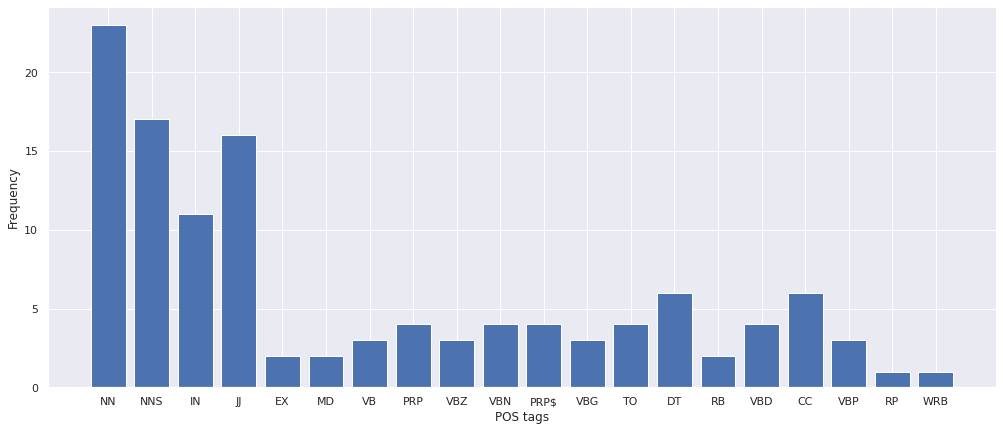

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
sns.set_theme()

tagged_text = preprocess(news, remove_punctuation=True, lowercase=True,  numbers_to_words_or_remove='remove', remove_stopwords=False, stemmer=None, lemmatizer=None, pos_tagging=True)

print(tagged_text)

tags = [tag for token, tag in tagged_text]
freq = Counter(tags)

fig = plt.figure(figsize = (17, 7))
plt.bar(freq.keys(), freq.values())
plt.xlabel("POS tags")
plt.ylabel("Frequency")
plt.show()

3. Modificati functia de mai sus astfel incat sa efectueze POS-tagging inainte sau dupa lematizare. Comparati diferentele. Afisati cuvintele (top 20) pentru care POS tag-ul identificat difera cel mai des intre cele doua versiuni.

/

Modify your function such that POS-tagging is performed before or after lemmatization. Print the words in the vocabulary (top 20) for which the identified POS tag differs most often between the two versions.

In [ ]:
def preprocess_2(text, remove_punctuation=True, lowercase=True, numbers_to_words_or_remove=None, remove_stopwords=False, stemmer=None, lemmatizer=None):
  if remove_punctuation:
    text = text.translate(str.maketrans('', '', string.punctuation))

  if lowercase:
    text = text.lower()

  if numbers_to_words_or_remove == "remove":
    text = re.sub(r'\d+', '', text)

  if numbers_to_words_or_remove == "words":
    digits = re.findall(r'\d+', text)
    for digit in digits:
        word = num2words(int(digit))
        text = text.replace(digit, word)

  tokens = word_tokenize(text)

  if remove_stopwords:
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if not token in stop_words]

  if stemmer:
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

  if lemmatizer == "before":
    lemmatizer = WordNetLemmatizer()
    tagged_tokens = pos_tag(tokens)
    tagged_lemmas = []
    for token, tag in tagged_tokens:
      lemma = lemmatizer.lemmatize(token)
      tagged_lemmas.append((lemma, tag))
    return tagged_lemmas

  elif lemmatizer == "after":
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    tagged_tokens = pos_tag(tokens)
    return tagged_tokens

  return tokens

In [ ]:
tagged_text_before = preprocess_2(news, remove_punctuation=True, lowercase=True,  numbers_to_words_or_remove='remove', remove_stopwords=False, stemmer=None, lemmatizer="before")
tagged_text_after = preprocess_2(news, remove_punctuation=True, lowercase=True,  numbers_to_words_or_remove='remove', remove_stopwords=False, stemmer=None, lemmatizer="after")


In [ ]:
print(len(tagged_text_before))
print(len(tagged_text_after))

119
119


In [ ]:
for a, b in zip(tagged_text_before, tagged_text_after):
  if a != b:
    print(a, b)

('consequence', 'NNS') ('consequence', 'NN')
('u', 'PRP') ('u', 'JJ')
('ha', 'VBZ') ('ha', 'NN')
('warned', 'VBN') ('warned', 'VBD')
('consequence', 'NNS') ('consequence', 'NN')
('reporter', 'NNS') ('reporter', 'VB')
('u', 'PRP') ('u', 'NN')
('it', 'PRP$') ('it', 'PRP')
('ally', 'NNS') ('ally', 'RB')
('troop', 'NNS') ('troop', 'NN')
('ukraine', 'NNS') ('ukraine', 'VB')
('border', 'NNS') ('border', 'NN')
('moscow', 'VBP') ('moscow', 'NN')
('ha', 'VBZ') ('ha', 'NN')
('denied', 'VBN') ('denied', 'VBD')
('say', 'VBZ') ('say', 'VBP')
('reserve', 'NNS') ('reserve', 'VBZ')
('it', 'PRP$') ('it', 'PRP')
('force', 'NNS') ('force', 'NN')
('it', 'PRP$') ('it', 'PRP')
('territory', 'NN') ('territory', 'JJ')
('tension', 'NNS') ('tension', 'NN')
('separatist', 'NNS') ('separatist', 'NN')
('part', 'NNS') ('part', 'NN')
('ukraine', 'NNS') ('ukraine', 'JJ')
('donetsk', 'NNS') ('donetsk', 'NN')
('region', 'NNS') ('region', 'NN')


4. Gasiti bigramele de POS tags cele mai frecvente in textul analizat, si apoi in propozitiile tagged din Brown corpus.

/

Find the most frequent POS tag bigrams occurring in the analyzed text, then in the tagged sentences in the Brown corpus.

In [ ]:
from nltk import bigrams, FreqDist

tokens = nltk.word_tokenize(news)
tagged_tokens = nltk.pos_tag(tokens)
bigram_freq = FreqDist(list(bigrams(tags)))
print(bigram_freq.most_common(10))

[(('NN', 'NN'), 6), (('JJ', 'NNS'), 5), (('JJ', 'NN'), 5), (('NNS', 'IN'), 5), (('NN', 'IN'), 4), (('JJ', 'JJ'), 3), (('DT', 'NN'), 3), (('CC', 'JJ'), 3), (('NN', 'CC'), 3), (('NN', 'NNS'), 2)]


In [ ]:
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [ ]:
from nltk.corpus import brown
tagged_sentences = brown.tagged_sents()
bigrams = Counter([bigram for sentence in tagged_sentences for bigram in nltk.bigrams(tag for _, tag in sentence)])
print(bigrams.most_common(10))

[(('AT', 'NN'), 48372), (('IN', 'AT'), 43271), (('NN', 'IN'), 42252), (('JJ', 'NN'), 28407), (('NN', '.'), 19857), (('AT', 'JJ'), 19487), (('NN', ','), 18279), (('IN', 'NN'), 17225), (('NNS', 'IN'), 14504), (('TO', 'VB'), 12291)]


5. Write a grammar and code to produce two trees, one for each reading of the phrase "old men and women"

In [ ]:
grammar = nltk.CFG.fromstring("""
    S -> NP Conj NP
    NP -> Adj N | Adj NP | Det N | Det Adj N
    Adj -> 'old'
    N -> 'men' | 'women'
    Conj -> 'and'
    Det -> 'the'
""")

In [ ]:
sent = ["old", "men", "and", "women"]
parser = nltk.ChartParser(grammar)
for tree in list(parser.parse(sent)):
  print(tree)

# Mini-proiect / Homework (+3p)

(v PDF separat)